In [21]:
import matplotlib.pyplot as plt
import numpy as np
import mcu
from importlib import reload
import swissroll_dataset_generator as roll

reload(mcu)
reload(roll)

<module 'pipeline' from 'C:\\Users\\einkina\\Documents\\School\\Manifold Learning\\manifold-learning\\pipeline.py'>

In [22]:
control_vars = roll.get_control_vars(roll.get_p())
response_matrix = roll.generate_array_of_swiss_rolls(control_vars)
k = 2
c = 1e3
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, response_matrix, k)
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

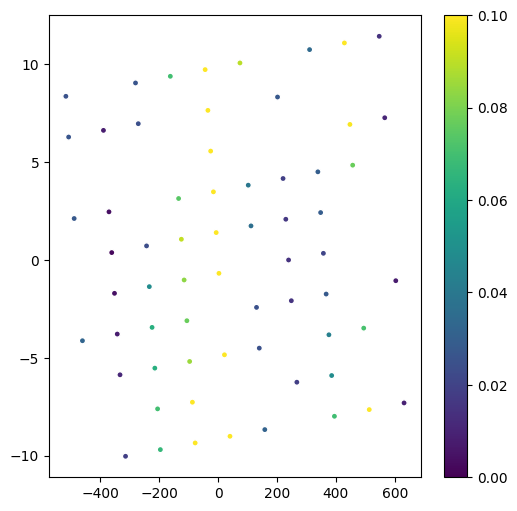

0.03142696796524248


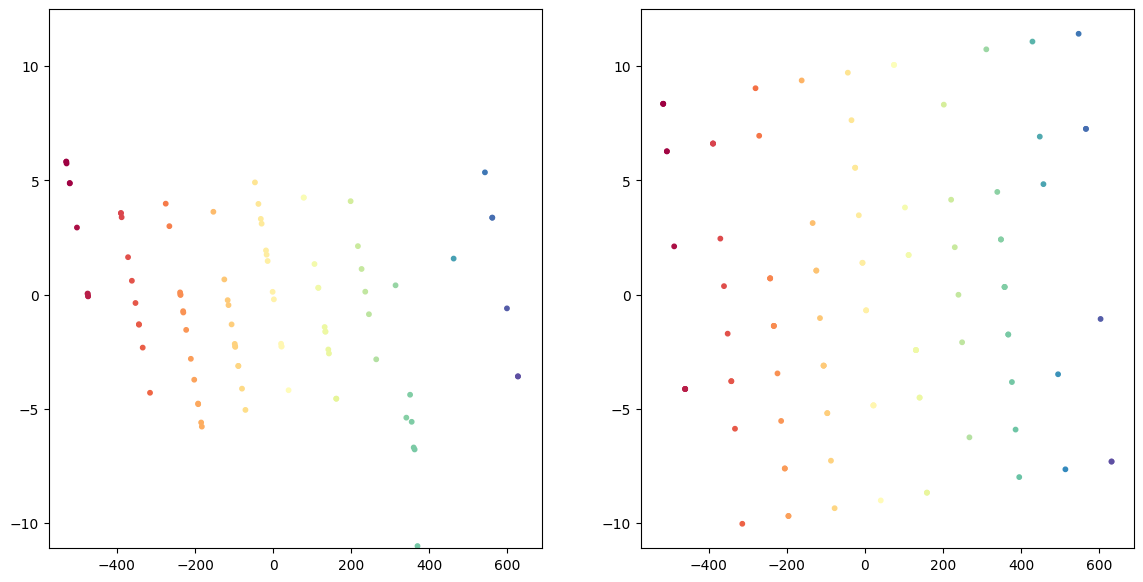

In [24]:
ld_embedding = mcu.reduce_dimensions(q)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = mcu.compute_rre(ld_embedding, reconstructed_y)
mcu.plot_rre_heatmap(rre, reconstructed_y)
print(np.median(rre))
mcu.plot_two_embeddings(ld_embedding, reconstructed_y)

In [25]:
reload(mcu)
test_control_vars = roll.get_control_vars(300)
test_rolls = roll.generate_array_of_swiss_rolls(test_control_vars, 300)
x_opts = []
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = mcu.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler, k)
    x_opt = x_opt * x_stds + x_means
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

-----------
x_opt  = [8.71578696 1.71330362], x_err = 8.538663646061987e-12
x_real = [6, 2]
-----------
x_opt  = [6.83569144 1.72939066], x_err = 3.2677565400657396e-13
x_real = [2, 2]
-----------
x_opt  = [4.80905859 4.48064084], x_err = 9.349070517550475e-12
x_real = [3, 5]
-----------
x_opt  = [5.34474215 2.48323047], x_err = 1.0682737914210662e-11
x_real = [6, 3]
-----------
x_opt  = [8.55855886 5.15824262], x_err = 8.537457455154616e-12
x_real = [5, 4]
-----------
x_opt  = [3.66799701 3.24646262], x_err = 6.239375620703953e-12
x_real = [7, 4]
-----------
x_opt  = [1.73646984 8.41976607], x_err = 2657.834016726414
x_real = [1, 9]
-----------
x_opt  = [4.29057689 5.71317521], x_err = 1.5028928475693709e-12
x_real = [9, 5]
-----------
x_opt  = [8.92353016 1.58023393], x_err = 19.6686302246509
x_real = [9, 1]
-----------
x_opt  = [8.22393559 7.61812415], x_err = 1.078147121824552e-11
x_real = [5, 8]
-----------
x_opt  = [7.10997681 7.0958534 ], x_err = 1.136495203645826e-11
x_real = [

[2.73087781 4.84325729 1.88213361 0.83451399 3.74230772 3.41614732
 0.93758159 4.76311714 0.58525127 3.24647345 1.55978947 6.07522869
 5.49562453 7.519422   1.04004191 6.45979483 4.92358396 2.16357492
 1.94241671 2.53028302 3.05937083 1.69547649 1.26082714 3.00382891
 1.08807955 5.75885822 2.76056299 1.39038839 0.58927218 5.49562453
 5.84891123 3.91931836 1.74342396 2.53341209 8.41326749 4.02925046
 4.54695818 6.11848225 3.97552211 3.21200781 2.92004743 1.00873723
 2.39575484 5.17097074 3.07295668 1.13649587 2.04167126 4.01098108
 6.37612212 7.20618323 0.88181457 2.1615009  5.61479229 1.62989732
 0.88601724 1.74342396 2.27299616 2.29370115 0.85030515 4.54695818
 2.59881578 6.68563661 3.21391793 4.98516184 1.07714628 7.4286909
 0.93758159 0.93758159 5.8444775  0.80657737 5.89749909 0.6372751
 0.92606009 1.07200802 6.8480794  1.96385071 2.24481706 1.22577961
 2.85960637 0.93417403 3.62598516 7.43343861 0.97253368 0.86211489
 3.66198864 4.84579926 2.28755043 1.40884612 2.17886751 2.023276

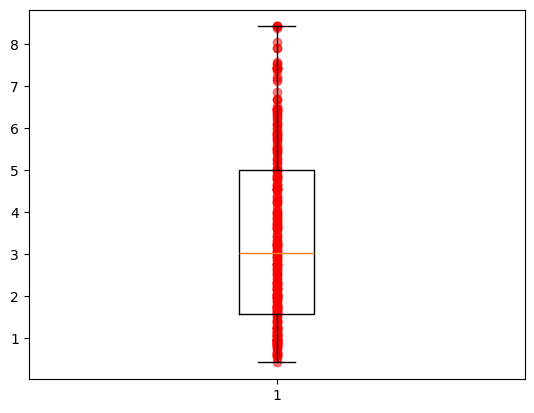

In [26]:
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")